In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
covid_df_us=pd.read_csv("C:/Users/Mubaraq/Downloads/COVID-19 in USA/us_states_covid19_daily.csv")
#importing datasets on covid 19 in states in US

In [3]:
pd.set_option("display.max_columns", None)
covid_df_us.head(30)

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20201206,AK,35720.0,NaN,1042056.0,NaN,totalTestsViral,1077776.0,164.0,799.0,NaN,NaN,21.0,NaN,7165.0,A,12/6/2020 03:59,2020-12-06T03:59:00Z,12/05 22:59,143.0,799.0,2020-12-06T03:59:00Z,1077776.0,43746.0,1032815.0,NaN,143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,757,9788,1077776,10545,1077776,0,0,7b1d31e2756687bb9259b29195f1db6cdb321ea6,0,0,0,0,0,NaN
1,20201206,AL,269877.0,45962.0,1421126.0,NaN,totalTestsPeopleViral,1645041.0,1927.0,26331.0,NaN,2290.0,NaN,1317.0,168387.0,A,12/6/2020 11:00,2020-12-06T11:00:00Z,12/06 06:00,3889.0,26331.0,2020-12-06T11:00:00Z,NaN,NaN,NaN,223915.0,3462.0,427.0,NaN,1645041.0,NaN,NaN,NaN,74784.0,NaN,NaN,NaN,NaN,NaN,NaN,1,2288,5769,1691003,7880,1691003,12,0,19454ed8fe28fc0a7948fc0771b2f3c846c1c92e,0,0,0,0,0,NaN
2,20201206,AR,170924.0,22753.0,1614979.0,NaN,totalTestsViral,1763150.0,1076.0,9401.0,374.0,NaN,179.0,1038.0,149490.0,A+,12/6/2020 00:00,2020-12-06T00:00:00Z,12/05 19:00,2660.0,9401.0,2020-12-06T00:00:00Z,1763150.0,NaN,1614979.0,148171.0,2437.0,223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155934.0,27710.0,21856.0,3300.0,5,1542,13244,1785903,14704,1785903,40,21,25fc83bffff5b32ba1a737be8e087fad9f4fde33,0,0,0,0,0,NaN
3,20201206,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,12/1/2020 00:00,2020-12-01T00:00:00Z,11/30 19:00,0.0,NaN,2020-12-01T00:00:00Z,2140.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,0,0,2140,0,2140,0,0,8c39eec317586b0c34fc2903e6a3891ecb00469e,0,0,0,0,0,NaN
4,20201206,AZ,364276.0,12590.0,2018813.0,NaN,totalTestsPeopleViral,2370499.0,2977.0,28248.0,714.0,NaN,462.0,NaN,56382.0,A+,12/6/2020 00:00,2020-12-06T00:00:00Z,12/05 19:00,6950.0,28248.0,2020-12-06T00:00:00Z,NaN,NaN,NaN,351686.0,6431.0,519.0,NaN,2370499.0,370928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,5376,15661,2383089,20586,2383089,25,242,7cf59da9e4bc31d905e179211313d08879880a85,0,0,0,0,0,NaN
5,20201206,CA,1341700.0,NaN,23853346.0,NaN,totalTestsViral,25195046.0,10624.0,NaN,2393.0,NaN,NaN,NaN,NaN,B,12/6/2020 02:59,2020-12-06T02:59:00Z,12/05 21:59,19876.0,NaN,2020-12-06T02:59:00Z,25195046.0,NaN,NaN,1341700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,30075,262996,25195046,293071,25195046,85,0,2fbb11905a59ffc894c8ec1ec6f051691be2381c,0,0,0,0,0,NaN
6,20201206,CO,260581.0,11069.0,1608829.0,NaN,totalTestEncountersViral,3478160.0,1750.0,14868.0,NaN,NaN,NaN,NaN,13941.0,A,12/6/2020 01:59,2020-12-06T01:59:00Z,12/05 20:59,2724.0,14868.0,2020-12-06T01:59:00Z,NaN,NaN,NaN,249512.0,NaN,NaN,3478160.0,1858341.0,214953.0,18864.0,196089.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,3234,34610,1869410,36046,1869410,0,24,b4df83fcc4f4ed0a3f62c46ac7c1c5122afad538,0,0,0,0,0,NaN
7,20201206,CT,127715.0,8131.0,3294383.0,NaN,posNeg,3422098.0,1150.0,12257.0,NaN,NaN,NaN,NaN,9800.0,C,12/3/2020 20:30,2020-12-03T20:30:00Z,12/03 15:30,5146.0,12257.0,2020-12-03T20:30:00Z,3413967.0,NaN,NaN,119584.0,4143.0,1003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49816.0,NaN,9,0,0,3422098,0,3422098,0,0,9fbbab70cc68c6bd651d4d7782679d747ebaf836,0,0,0,0,0,NaN
8,20201206,DC,23136.0,NaN,711497.0,NaN,totalTestEncountersViral,734633.0,171.0,NaN,50.

In [4]:
#to have an overview of the dataset
covid_df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15633 entries, 0 to 15632
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         15633 non-null  int64  
 1   state                        15633 non-null  object 
 2   positive                     15481 non-null  float64
 3   probableCases                5449 non-null   float64
 4   negative                     15323 non-null  float64
 5   pending                      1684 non-null   float64
 6   totalTestResultsSource       15633 non-null  object 
 7   totalTestResults             15598 non-null  float64
 8   hospitalizedCurrently        12516 non-null  float64
 9   hospitalizedCumulative       9434 non-null   float64
 10  inIcuCurrently               7713 non-null   float64
 11  inIcuCumulative              2700 non-null   float64
 12  onVentilatorCurrently        6211 non-null   float64
 13  onVentilatorCumu

In [5]:
#Data cleaning
#dropping the columns portraying unfamiliar statistical data   
covid_df_us.drop(["deathProbable","totalTestEncountersViral","totalTestsPeopleViral","totalTestsAntibody","positiveTestsAntibody","negativeTestsAntibody","totalTestsPeopleAntibody","positiveTestsPeopleAntibody","negativeTestsPeopleAntibody","totalTestsPeopleAntigen","positiveTestsPeopleAntigen","totalTestsAntigen","positiveTestsAntigen","fips","positiveIncrease","negativeIncrease","total","totalTestResultsIncrease","posNeg","deathIncrease","hospitalizedIncrease","hash","commercialScore","negativeRegularScore","negativeScore","positiveScore","score","grade","inIcuCurrently","inIcuCumulative","onVentilatorCumulative"],inplace=True,axis=1)

In [6]:
covid_df_us.tail(300)

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,onVentilatorCurrently,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed
15333,20200307,NE,1.0,NaN,17.0,5.0,totalTestsViral,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0,0.0,69.0,NaN,NaN
15334,20200307,NH,2.0,NaN,20.0,3.0,totalTestsViral,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,NaN,NaN,NaN,NaN
15335,20200307,NJ,4.0,NaN,NaN,1.0,posNeg,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN
15336,20200307,NM,0.0,NaN,48.0,0.0,posNeg,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15337,20200307,NV,4.0,NaN,14.0,NaN,totalTestEncountersViral,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15628,20200124,WA,0.0,NaN,0.0,NaN,totalTestEncountersViral,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
15629,20200123,MA,NaN,NaN,NaN,NaN,totalTestsViral,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN
15630,20200123,WA,0.0,NaN,0.0,NaN,totalTestEncountersViral,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
15631,20200122,MA,NaN,NaN,NaN,NaN,totalTestsViral,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN


In [7]:
#checking for null values in the data set
covid_df_us.isnull().sum()

date                          0
state                         0
positive                    152
probableCases             10184
negative                    310
pending                   13949
totalTestResultsSource        0
totalTestResults             35
hospitalizedCurrently      3117
hospitalizedCumulative     6199
onVentilatorCurrently      9422
recovered                  4522
dataQualityGrade           1261
lastUpdateEt                487
dateModified                487
checkTimeEt                 487
death                       826
hospitalized               6199
dateChecked                 487
totalTestsViral            5812
positiveTestsViral        10621
negativeTestsViral        12318
positiveCasesViral         3516
deathConfirmed             8783
dtype: int64

In [8]:
#dropping null values in the dataset
covid_df_us=covid_df_us.fillna(0)

In [9]:
covid_df_us.head(30)

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,onVentilatorCurrently,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed
0,20201206,AK,35720.0,0.0,1042056.0,0.0,totalTestsViral,1077776.0,164.0,799.0,21.0,7165.0,A,12/6/2020 03:59,2020-12-06T03:59:00Z,12/05 22:59,143.0,799.0,2020-12-06T03:59:00Z,1077776.0,43746.0,1032815.0,0.0,143.0
1,20201206,AL,269877.0,45962.0,1421126.0,0.0,totalTestsPeopleViral,1645041.0,1927.0,26331.0,0.0,168387.0,A,12/6/2020 11:00,2020-12-06T11:00:00Z,12/06 06:00,3889.0,26331.0,2020-12-06T11:00:00Z,0.0,0.0,0.0,223915.0,3462.0
2,20201206,AR,170924.0,22753.0,1614979.0,0.0,totalTestsViral,1763150.0,1076.0,9401.0,179.0,149490.0,A+,12/6/2020 00:00,2020-12-06T00:00:00Z,12/05 19:00,2660.0,9401.0,2020-12-06T00:00:00Z,1763150.0,0.0,1614979.0,148171.0,2437.0
3,20201206,AS,0.0,0.0,2140.0,0.0,totalTestsViral,2140.0,0.0,0.0,0.0,0.0,D,12/1/2020 00:00,2020-12-01T00:00:00Z,11/30 19:00,0.0,0.0,2020-12-01T00:00:00Z,2140.0,0.0,0.0,0.0,0.0
4,20201206,AZ,364276.0,12590.0,2018813.0,0.0,totalTestsPeopleViral,2370499.0,2977.0,28248.0,462.0,56382.0,A+,12/6/2020 00:00,2020-12-06T00:00:00Z,12/05 19:00,6950.0,28248.0,2020-12-06T00:00:00Z,0.0,0.0,0.0,351686.0,6431.0
5,20201206,CA,1341700.0,0.0,23853346.0,0.0,totalTestsViral,25195046.0,10624.0,0.0,0.0,0.0,B,12/6/2020 02:59,2020-12-06T02:59:00Z,12/05 21:59,19876.0,0.0,2020-12-06T02:59:00Z,25195046.0,0.0,0.0,1341700.0,0.0
6,20201206,CO,260581.0,11069.0,1608829.0,0.0,totalTestEncountersViral,3478160.0,1750.0,14868.0,0.0,13941.0,A,12/6/2020 01:59,2020-12-06T01:59:00Z,12/05 20:59,2724.0,14868.0,2020-12-06T01:59:00Z,0.0,0.0,0.0,249512.0,0.0
7,20201206,CT,127715.0,8131.0,3294383.0,0.0,posNeg,3422098.0,1150.0,12257.0,0.0,9800.0,C,12/3/2020 20:30,2020-12-03T20:30:00Z,12/03 15:30,5146.0,12257.0,2020-12-03T20:30:00Z,3413967.0,0.0,0.0,119584.0,4143.0
8,20201206,DC,23136.0,0.0,711497.0,0.0,totalTestEncountersViral,734633.0,171.0,0.0,23.0,16665.0,A+,12/5/2020 00:00,2020-12-05T00:00:00Z,12/04 19:00,697.0,0.0,2020-12-05T00:00:00Z,0.0,0.0,0.0,0.0,0.0
9,20201206,DE,39912.0,1550.0,400854.0,0.0,totalTestEncountersViral,778298.0,315.0,0.0,0.0,18851.0,A+,12/5/2020 18:00,2020-12-05T18:00:00Z,12/05 13:00,793.0,0.0,2020-12-05T18:00:00Z,0.0,40267.0,0.0,38362.0,698.0


In [10]:
covid_df_us.dtypes

date                        int64
state                      object
positive                  float64
probableCases             float64
negative                  float64
pending                   float64
totalTestResultsSource     object
totalTestResults          float64
hospitalizedCurrently     float64
hospitalizedCumulative    float64
onVentilatorCurrently     float64
recovered                 float64
dataQualityGrade           object
lastUpdateEt               object
dateModified               object
checkTimeEt                object
death                     float64
hospitalized              float64
dateChecked                object
totalTestsViral           float64
positiveTestsViral        float64
negativeTestsViral        float64
positiveCasesViral        float64
deathConfirmed            float64
dtype: object

In [11]:
for i in covid_df_us.columns:
    if covid_df_us[i].dtypes=="float64":
        covid_df_us[i]=covid_df_us[i].astype("int64")
covid_df_us.head(30)

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,onVentilatorCurrently,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed
0,20201206,AK,35720,0,1042056,0,totalTestsViral,1077776,164,799,21,7165,A,12/6/2020 03:59,2020-12-06T03:59:00Z,12/05 22:59,143,799,2020-12-06T03:59:00Z,1077776,43746,1032815,0,143
1,20201206,AL,269877,45962,1421126,0,totalTestsPeopleViral,1645041,1927,26331,0,168387,A,12/6/2020 11:00,2020-12-06T11:00:00Z,12/06 06:00,3889,26331,2020-12-06T11:00:00Z,0,0,0,223915,3462
2,20201206,AR,170924,22753,1614979,0,totalTestsViral,1763150,1076,9401,179,149490,A+,12/6/2020 00:00,2020-12-06T00:00:00Z,12/05 19:00,2660,9401,2020-12-06T00:00:00Z,1763150,0,1614979,148171,2437
3,20201206,AS,0,0,2140,0,totalTestsViral,2140,0,0,0,0,D,12/1/2020 00:00,2020-12-01T00:00:00Z,11/30 19:00,0,0,2020-12-01T00:00:00Z,2140,0,0,0,0
4,20201206,AZ,364276,12590,2018813,0,totalTestsPeopleViral,2370499,2977,28248,462,56382,A+,12/6/2020 00:00,2020-12-06T00:00:00Z,12/05 19:00,6950,28248,2020-12-06T00:00:00Z,0,0,0,351686,6431
5,20201206,CA,1341700,0,23853346,0,totalTestsViral,25195046,10624,0,0,0,B,12/6/2020 02:59,2020-12-06T02:59:00Z,12/05 21:59,19876,0,2020-12-06T02:59:00Z,25195046,0,0,1341700,0
6,20201206,CO,260581,11069,1608829,0,totalTestEncountersViral,3478160,1750,14868,0,13941,A,12/6/2020 01:59,2020-12-06T01:59:00Z,12/05 20:59,2724,14868,2020-12-06T01:59:00Z,0,0,0,249512,0
7,20201206,CT,127715,8131,3294383,0,posNeg,3422098,1150,12257,0,9800,C,12/3/2020 20:30,2020-12-03T20:30:00Z,12/03 15:30,5146,12257,2020-12-03T20:30:00Z,3413967,0,0,119584,4143
8,20201206,DC,23136,0,711497,0,totalTestEncountersViral,734633,171,0,23,16665,A+,12/5/2020 00:00,2020-12-05T00:00:00Z,12/04 19:00,697,0,2020-12-05T00:00:00Z,0,0,0,0,0
9,20201206,DE,39912,1550,400854,0,totalTestEncountersViral,778298,315,0,0,18851,A+,12/5/2020 18:00,2020-12-05T18:00:00Z,12/05 13:00,793,0,2020-12-05T18:00:00Z,0,40267,0,38362,698


In [12]:
#Deducing the number of unconfirmed death 
covid_df_us["Unconfirmed death"]= covid_df_us["death"] - covid_df_us["deathConfirmed"]

In [13]:
covid_df_us["date"]=covid_df_us["date"].astype(str).str[:4] + "/" + covid_df_us["date"].astype(str).str[4:6] + "/"+ covid_df_us["date"].astype(str).str[5:7]

In [14]:
pd.set_option("display.max_rows",100)
covid_df_us.head(100)

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,onVentilatorCurrently,recovered,dataQualityGrade,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,Unconfirmed death
0,2020/12/20,AK,35720,0,1042056,0,totalTestsViral,1077776,164,799,21,7165,A,12/6/2020 03:59,2020-12-06T03:59:00Z,12/05 22:59,143,799,2020-12-06T03:59:00Z,1077776,43746,1032815,0,143,0
1,2020/12/20,AL,269877,45962,1421126,0,totalTestsPeopleViral,1645041,1927,26331,0,168387,A,12/6/2020 11:00,2020-12-06T11:00:00Z,12/06 06:00,3889,26331,2020-12-06T11:00:00Z,0,0,0,223915,3462,427
2,2020/12/20,AR,170924,22753,1614979,0,totalTestsViral,1763150,1076,9401,179,149490,A+,12/6/2020 00:00,2020-12-06T00:00:00Z,12/05 19:00,2660,9401,2020-12-06T00:00:00Z,1763150,0,1614979,148171,2437,223
3,2020/12/20,AS,0,0,2140,0,totalTestsViral,2140,0,0,0,0,D,12/1/2020 00:00,2020-12-01T00:00:00Z,11/30 19:00,0,0,2020-12-01T00:00:00Z,2140,0,0,0,0,0
4,2020/12/20,AZ,364276,12590,2018813,0,totalTestsPeopleViral,2370499,2977,28248,462,56382,A+,12/6/2020 00:00,2020-12-06T00:00:00Z,12/05 19:00,6950,28248,2020-12-06T00:00:00Z,0,0,0,351686,6431,519
5,2020/12/20,CA,1341700,0,23853346,0,totalTestsViral,25195046,10624,0,0,0,B,12/6/2020 02:59,2020-12-06T02:59:00Z,12/05 21:59,19876,0,2020-12-06T02:59:00Z,25195046,0,0,1341700,0,19876
6,2020/12/20,CO,260581,11069,1608829,0,totalTestEncountersViral,3478160,1750,14868,0,13941,A,12/6/2020 01:59,2020-12-06T01:59:00Z,12/05 20:59,2724,14868,2020-12-06T01:59:00Z,0,0,0,249512,0,2724
7,2020/12/20,CT,127715,8131,3294383,0,posNeg,3422098,1150,12257,0,9800,C,12/3/2020 20:30,2020-12-03T20:30:00Z,12/03 15:30,5146,12257,2020-12-03T20:30:00Z,3413967,0,0,119584,4143,1003
8,2020/12/20,DC,23136,0,711497,0,totalTestEncountersViral,734633,171,0,23,16665,A+,12/5/2020 00:00,2020-12-05T00:00:00Z,12/04 19:00,697,0,2020-12-05T00:00:00Z,0,0,0,0,0,697
9,2020/12/20,DE,39912,1550,400854,0,totalTestEncountersViral,778298,315,0,0,18851,A+,12/5/2020 18:00,2020-12-05T18:00:00Z,12/05 13:00,793,0,2020-12-05T18:00:00Z,0,40267,0,38362,698,95


In [15]:
#to have a statistical analysis of the numerical columns in the dataset
covid_df_us.describe()

,positive,probableCases,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,onVentilatorCurrently,recovered,death,hospitalized,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,Unconfirmed death
count,1.563300e+04,15633.000000,1.563300e+04,15633.000000,1.563300e+04,15633.000000,15633.000000,15633.000000,1.563300e+04,15633.000000,15633.000000,1.563300e+04,1.563300e+04,1.563300e+04,1.563300e+04,15633.000000,15633.000000
mean,8.112820e+04,1789.010427,9.635311e+05,160.796904,1.156804e+06,754.713043,4922.449498,51.720079,2.929636e+04,2363.371586,4922.449498,8.625418e+05,3.094337e+04,2.217683e+05,7.433786e+04,1260.611079,1102.760507
std,1.493628e+05,5514.887874,2.078478e+06,1715.015520,2.324334e+06,1467.915926,12486.198385,142.360114,7.567281e+04,4401.312017,12486.198385,2.071367e+06,1.046082e+05,8.353563e+05,1.457005e+05,2730.285496,3683.662914
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-90.000000
25%,2.538000e+03,0.000000,4.281500e+04,0.000000,5.014300e+04,19.000000,0.000000,0.000000,0.000000e+00,58.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000,4.000000
50%,2.234800e+04,0.000000,2.804890e+05,0.000000,3.505280e+05,284.000000,347.000000,0.000000,3.277000e+03,578.000000,347.000000,5.318400e+04,0.000000e+00,0.000000e+00,1.575100e+04,0.000000,116.000000
75%,9.565900e+04,600.000000,9.600450e+05,0.000000,1.188605e+06,844.000000,4514.000000,48.000000,2.593200e+04,2526.000000,4514.000000,7.441830e+05,5.703000e+03,0.000000e+00,8.633300e+04,1197.000000,468.000000
max,1.341700e+06,100964.000000,2.385335e+07,64400.000000,2.519505e+07,18825.000000,89995.000000,2425.000000,1.030716e+06,27149.000000,89995.000000,2.519505e+07,1.350646e+06,1.023874e+07,1.341700e+06,19423.000000,27149.000000


In [16]:
#displaying each states in the US with its total number of covid 19 related deaths 
covid_df_us.groupby("state")["death"].sum()

state
AK       9519
AL     417014
AR     205692
AS          0
AZ     851473
CA    2479768
CO     394757
CT     979579
DC     127968
DE     129765
FL    2151590
GA    1137873
GU       7241
HI      20272
IA     247511
ID      75983
IL    1802050
IN     736476
KS     128749
KY     210659
LA    1007937
MA    1937825
MD     782196
ME      28475
MI    1578499
MN     408866
MO     385015
MP        493
MS     463052
MT      37162
NC     573710
ND      56870
NE      92484
NH      86402
NJ    3474435
NM     163873
NV     252428
NY    5817666
OH     862696
OK     179032
OR      95458
PA    1640049
PR     100879
RI     221767
SC     495925
SD      53655
TN     396658
TX    2215251
UT      83092
VA     553724
VI       2920
VT      13746
WA     408482
WI     293398
WV      56543
WY      11986
Name: death, dtype: int64

In [17]:
US_deaths=covid_df_us.groupby("state")["death"].sum().sort_values(ascending=False).head(10)

In [18]:
#To visualize the Data

Text(0.5, 0.98, 'Graph showing the top ten states in the US with the highest number of deaths due to covid')

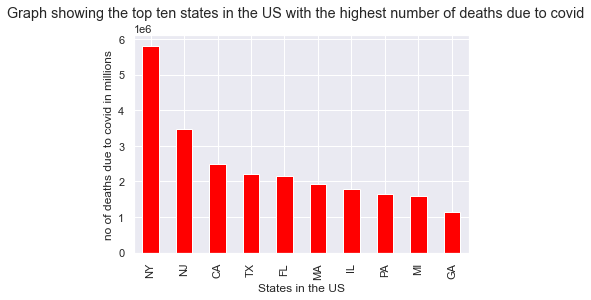

In [19]:
#A graph showing the top ten states in the US with the highest number of deaths
sns.set(style="darkgrid")
US_deaths.plot(kind="bar",color=["red"])
plt.xlabel("States in the US")
plt.ylabel("no of deaths due to covid in millions")
plt.suptitle("Graph showing the top ten states in the US with the highest number of deaths due to covid")

In [20]:
#we can draw a conclusion that New York(NJ) has the highest no. of deaths in the US 

In [21]:
#let's derive a correlation between the number of positive and negative covid 19 results 
#which brings us to a conclusion on how each states effectively curbs the spread of pandemic

In [22]:
covid_df_us.groupby("state")[["positive","negative"]].sum().sort_values(by="positive",ascending=False)

,positive,negative
state,,
CA,126643296,2183819832
TX,114486497,910191843
FL,106829756,751142471
NY,104056991,1725435452
IL,59718277,862140450
GA,48555886,406954073
NJ,46389594,559074051
AZ,35894317,201917924
NC,34455710,461090490


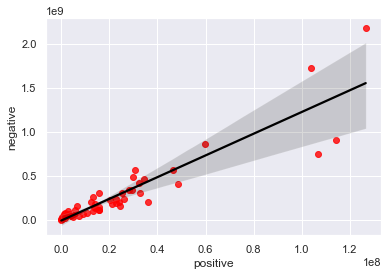

In [23]:
corr_data=covid_df_us.groupby("state")[["positive","negative"]].sum().sort_values(by="positive",ascending=False)
sns.regplot(x="positive",y="negative",data=corr_data,scatter_kws={"color":"red"},line_kws={"color":"black"});

In [24]:
#from the diagram above we can extrapolate that there's a positive correlation between the positive and negative covid 19 result
#hence drawing a conclusion that every state in US with high number of positive covid results also has a high number...... 
#..of negative covid 19 result so thus the covid 19 isn't inherently curbed by the US states 
#the result derived is due to the result of high population which aids the spread of the virus

In [25]:
#deriving our correlation matrix
corr_data.corr()

,positive,negative
positive,1.000000,0.909717
negative,0.909717,1.000000


<AxesSubplot:>

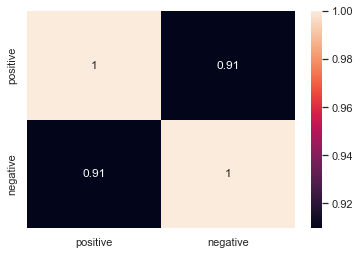

In [26]:
sns.heatmap(corr_data.corr(),annot=True)

In [27]:
#hence the correlation coefficient is 0.91..i.e. high positive correlation

In [28]:
#now providing states with hospitalized patients and patients on ventilators which signify severity of ailment which could..
#...lead to eventual death

In [29]:
hosp_vent=covid_df_us.groupby("state")[["hospitalizedCurrently","onVentilatorCurrently"]].sum().sort_values(by=["hospitalizedCurrently"],ascending=False)

In [30]:
hosp_vent

,hospitalizedCurrently,onVentilatorCurrently
state,,
CA,1280754,0
TX,1198295,0
NY,963633,66216
IL,691693,88023
FL,640342,0
NJ,532013,87626
GA,421679,0
MI,345629,67680
PA,338837,57751


<AxesSubplot:xlabel='state'>

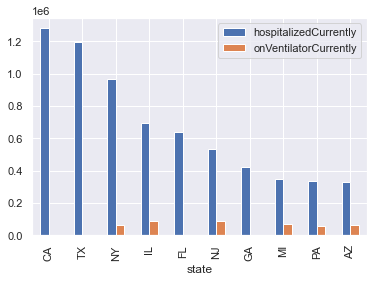

In [31]:
#considering the top ten states with the highest number of currently hospitalized patients
hosp_vent.head(10).plot(kind="bar")

In [32]:
#we can see that states such as california(CA), texas(TX) and florida(FL) have no patient on ventilator
#hence the remain states containing patients on ventilator predicts a high possibility of eventual death 
#which could spike the number of dead patients in the state